In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Load the dataset from Excel

file_path = './nonprofit.xlsx'  # Replace with the actual file path
df = pd.read_excel(file_path)

In [3]:
print(df.head())
print('\n\n\n')
print(df.info())

   ID region  ownd  kids  inc  sex  wlth   hv  incmed  incavg  low  npro  \
0   1   ter3     1     1    4    1     8  302      76      82    0    20   
1   2   ter3     1     2    4    0     8  262     130     130    1    95   
2   5   ter3     1     0    4    1     4  295      39      71   14    85   
3   6   ter2     1     1    5    0     9  114      17      25   44    83   
4   7   ter5     1     3    4    0     8  145      39      42   10    50   

   gifdol  gifl  gifr  mdon  lag   gifa  donr  damt  
0      81    81    19    17    6  21.05     0     0  
1     156    16    17    19    3  13.26     1    15  
2     132    15    10    10    6  12.07     1    17  
3     131     5     3    13    4   4.12     1    12  
4      74     6     5    22    3   6.50     0     0  




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6002 entries, 0 to 6001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      6002 non-null   int64

In [4]:
# Drop the 'ID' column as it is not used as a predictor variable

df.drop('ID', axis=1, inplace=True)
df.head(10)

,region,ownd,kids,inc,sex,wlth,hv,incmed,incavg,low,npro,gifdol,gifl,gifr,mdon,lag,gifa,donr,damt
0,ter3,1,1,4,1,8,302,76,82,0,20,81,81,19,17,6,21.05,0,0
1,ter3,1,2,4,0,8,262,130,130,1,95,156,16,17,19,3,13.26,1,15
2,ter3,1,0,4,1,4,295,39,71,14,85,132,15,10,10,6,12.07,1,17
3,ter2,1,1,5,0,9,114,17,25,44,83,131,5,3,13,4,4.12,1,12
4,ter5,1,3,4,0,8,145,39,42,10,50,74,6,5,22,3,6.50,0,0
5,ter5,1,3,2,0,5,165,34,35,19,11,41,4,2,20,7,3.45,0,0
6,ter5,1,3,4,1,7,200,38,58,5,42,63,12,10,19,3,9.42,0,0
7,ter3,1,3,2,1,8,152,46,46,20,100,414,25,14,39,7,10.12,0,0
8,ter4,1,3,4,1,6,272,69,69,0,98,169,29,36,23,7,8.97,1,17
9,ter2,1,0,4,0,9,207,54,54,14,13,34,9,7,19,11,6.28,1,12


In [5]:
# Handle missing values if any (replace NaN values with the mean, median, or other strategies)

df.fillna(df.mean(), inplace=True)
df.head(10)

<ipython-input-5-5fabb2ce71de>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,region,ownd,kids,inc,sex,wlth,hv,incmed,incavg,low,npro,gifdol,gifl,gifr,mdon,lag,gifa,donr,damt
0,ter3,1,1,4,1,8,302,76,82,0,20,81,81,19,17,6,21.05,0,0
1,ter3,1,2,4,0,8,262,130,130,1,95,156,16,17,19,3,13.26,1,15
2,ter3,1,0,4,1,4,295,39,71,14,85,132,15,10,10,6,12.07,1,17
3,ter2,1,1,5,0,9,114,17,25,44,83,131,5,3,13,4,4.12,1,12
4,ter5,1,3,4,0,8,145,39,42,10,50,74,6,5,22,3,6.50,0,0
5,ter5,1,3,2,0,5,165,34,35,19,11,41,4,2,20,7,3.45,0,0
6,ter5,1,3,4,1,7,200,38,58,5,42,63,12,10,19,3,9.42,0,0
7,ter3,1,3,2,1,8,152,46,46,20,100,414,25,14,39,7,10.12,0,0
8,ter4,1,3,4,1,6,272,69,69,0,98,169,29,36,23,7,8.97,1,17
9,ter2,1,0,4,0,9,207,54,54,14,13,34,9,7,19,11,6.28,1,12


In [6]:
# Separate features (X) and target variables (y) for classification and regression

X_classification = df.drop(['donr', 'damt'], axis=1)  # Features for donor classification
y_classification = df['donr']  # Target variable for donor classification

X_regression = df.drop(['donr', 'damt'], axis=1)  # Features for donation amount prediction
y_regression = df['damt']  # Target variable for donation amount prediction

print(X_classification, y_classification, X_regression, y_regression, sep='\n\n\n')

     region  ownd  kids  inc  sex  wlth   hv  incmed  incavg  low  npro  \
0      ter3     1     1    4    1     8  302      76      82    0    20   
1      ter3     1     2    4    0     8  262     130     130    1    95   
2      ter3     1     0    4    1     4  295      39      71   14    85   
3      ter2     1     1    5    0     9  114      17      25   44    83   
4      ter5     1     3    4    0     8  145      39      42   10    50   
...     ...   ...   ...  ...  ...   ...  ...     ...     ...  ...   ...   
5997   ter1     1     2    4    0     8  174      54      69    1   100   
5998   ter2     1     1    6    1     9  227      73      73    0    57   
5999   ter1     1     0    6    1     5  232      33      63    4    54   
6000   ter2     1     2    2    1     1  195      37      44   12    50   
6001   ter2     1     0    3    0     3  312      77      88    3    31   

      gifdol  gifl  gifr  mdon  lag   gifa  
0         81    81    19    17    6  21.05  
1        

In [7]:
# Split the data into training and testing sets for classification

X_train_donr, X_test_donr, y_train_donr, y_test_donr = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
print(X_train_donr, X_test_donr, y_train_donr, y_test_donr)

     region  ownd  kids  inc  sex  wlth   hv  incmed  incavg  low  npro  \
5629   ter5     1     0    3    1     8  209      43      55    5    84   
1756   ter5     0     2    3    1     8   61       7      20   43    63   
2346   ter1     1     0    4    1     7  303      43      93    4    22   
2996   ter5     1     0    4    1     8  195      39      57    7   106   
1595   ter4     1     2    4    0     8  204      78      78    1   117   
...     ...   ...   ...  ...  ...   ...  ...     ...     ...  ...   ...   
3772   ter5     1     3    3    0     6  266      57      60    6    26   
5191   ter2     1     2    6    0     8  121      35      35   33    41   
5226   ter2     1     2    4    1     5  199      50      50    6   104   
5390   ter2     1     0    4    0     8  151      26      49   15    67   
860    ter3     1     2    7    1     9  241      90      90    0    57   

      gifdol  gifl  gifr  mdon  lag   gifa  
5629     131    14    10    23    6   8.52  
1756     

In [8]:
# Upsample the donor class to handle class imbalance
df_upsampled = resample(df[df['donr'] == 1], replace=True, n_samples=df[df['donr'] == 0].shape[0], random_state=42)
df_upsampled = pd.concat([df[df['donr'] == 0], df_upsampled])

X_train_donr_upsampled = df_upsampled.drop(['donr', 'damt'], axis=1)
y_train_donr_upsampled = df_upsampled['donr']

In [9]:
# Preprocessing for classification (including one-hot encoding)
classification_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['kids', 'inc', 'wlth', 'hv', 'incmed', 'incavg', 'low', 'npro', 'gifdol', 'gifl', 'gifr', 'mdon', 'lag', 'gifa']),
        ('cat', OneHotEncoder(), ['region', 'ownd', 'sex'])
    ])

X_train_donr_preprocessed = classification_preprocessor.fit_transform(X_train_donr)
X_test_donr_preprocessed = classification_preprocessor.transform(X_test_donr)
X_train_donr_upsampled_preprocessed = classification_preprocessor.fit_transform(X_train_donr_upsampled)

In [10]:
# Split the data into training and testing sets for regression
X_train_damt, X_test_damt, y_train_damt, y_test_damt = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Preprocessing for regression (including one-hot encoding)
regression_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['kids', 'inc', 'wlth', 'hv', 'incmed', 'incavg', 'low', 'npro', 'gifdol', 'gifl', 'gifr', 'mdon', 'lag', 'gifa']),
        ('cat', OneHotEncoder(), ['region', 'ownd', 'sex'])
    ])

X_train_damt_preprocessed = regression_preprocessor.fit_transform(X_train_damt)
X_test_damt_preprocessed = regression_preprocessor.transform(X_test_damt)


Classification Metrics:
KNN Classifier Accuracy: 0.8159866777685262
MLP Classifier Accuracy: 0.8992506244796004
Random Forest Classifier Accuracy: 0.8834304746044963

Regression Metrics:
KNN Regressor MSE: 28.703813488759366
MLP Regressor MSE: 17.8130067666773
Random Forest Regressor MSE: 18.092603413821816


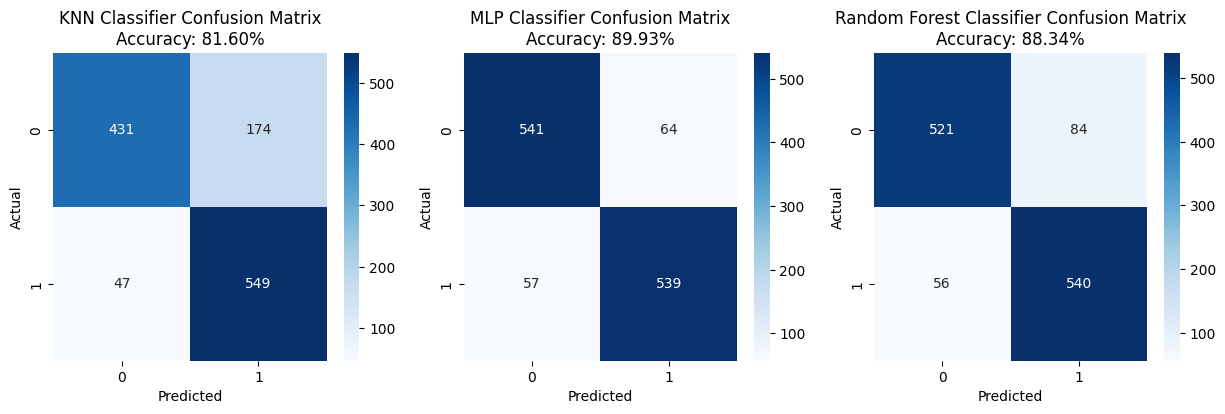

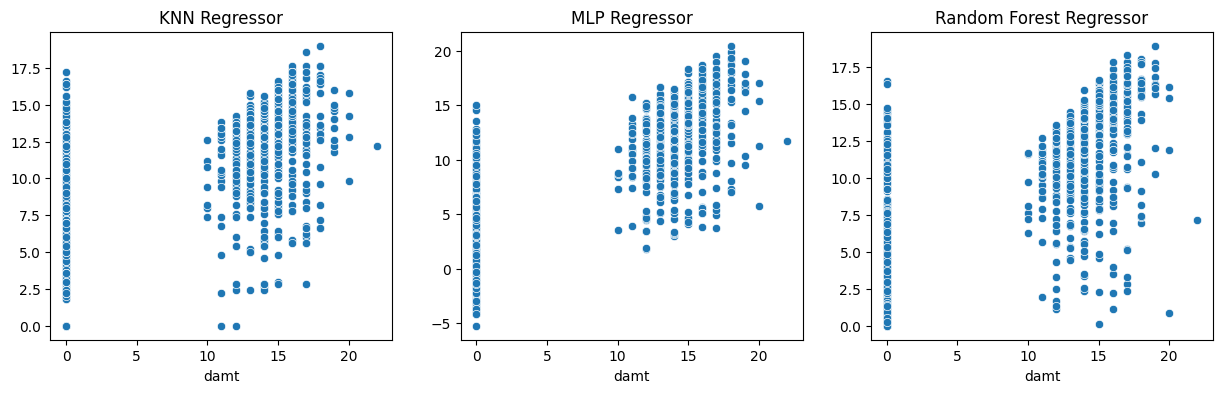

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Models for DONR variable

# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_donr_preprocessed, y_train_donr)

# Neural Network (MLPClassifier)
mlp_classifier = MLPClassifier(max_iter=500)
mlp_classifier.fit(X_train_donr_preprocessed, y_train_donr)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_donr_preprocessed, y_train_donr)

# Regression Models for DAMT variable

# K-Nearest Neighbors
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_damt_preprocessed, y_train_damt)

# Neural Network (MLPRegressor)
mlp_regressor = MLPRegressor(max_iter=500)
mlp_regressor.fit(X_train_damt_preprocessed, y_train_damt)

# Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_damt_preprocessed, y_train_damt)

# Compare Models using Metrics

# Classification Metrics
y_pred_knn_classifier = knn_classifier.predict(X_test_donr_preprocessed)
accuracy_knn_classifier = accuracy_score(y_test_donr, y_pred_knn_classifier)

y_pred_mlp_classifier = mlp_classifier.predict(X_test_donr_preprocessed)
accuracy_mlp_classifier = accuracy_score(y_test_donr, y_pred_mlp_classifier)

y_pred_rf_classifier = rf_classifier.predict(X_test_donr_preprocessed)
accuracy_rf_classifier = accuracy_score(y_test_donr, y_pred_rf_classifier)

# Regression Metrics
y_pred_knn_regressor = knn_regressor.predict(X_test_damt_preprocessed)
mse_knn_regressor = mean_squared_error(y_test_damt, y_pred_knn_regressor)

y_pred_mlp_regressor = mlp_regressor.predict(X_test_damt_preprocessed)
mse_mlp_regressor = mean_squared_error(y_test_damt, y_pred_mlp_regressor)

y_pred_rf_regressor = rf_regressor.predict(X_test_damt_preprocessed)
mse_rf_regressor = mean_squared_error(y_test_damt, y_pred_rf_regressor)

# Print Metrics
print("Classification Metrics:")
print("KNN Classifier Accuracy:", accuracy_knn_classifier)
print("MLP Classifier Accuracy:", accuracy_mlp_classifier)
print("Random Forest Classifier Accuracy:", accuracy_rf_classifier)

print("\nRegression Metrics:")
print("KNN Regressor MSE:", mse_knn_regressor)
print("MLP Regressor MSE:", mse_mlp_regressor)
print("Random Forest Regressor MSE:", mse_rf_regressor)

# Compare Models using Charts

# Classification Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.heatmap(pd.crosstab(y_test_donr, y_pred_knn_classifier, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='g', cmap='Blues', ax=axes[0])
sns.heatmap(pd.crosstab(y_test_donr, y_pred_mlp_classifier, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='g', cmap='Blues', ax=axes[1])
sns.heatmap(pd.crosstab(y_test_donr, y_pred_rf_classifier, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='g', cmap='Blues', ax=axes[2])
axes[0].set_title(f'KNN Classifier Confusion Matrix\nAccuracy: {accuracy_knn_classifier:.2%}')
axes[1].set_title(f'MLP Classifier Confusion Matrix\nAccuracy: {accuracy_mlp_classifier:.2%}')
axes[2].set_title(f'Random Forest Classifier Confusion Matrix\nAccuracy: {accuracy_rf_classifier:.2%}')
plt.show()

# Regression Scatter Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.scatterplot(x=y_test_damt, y=y_pred_knn_regressor, ax=axes[0])
sns.scatterplot(x=y_test_damt, y=y_pred_mlp_regressor, ax=axes[1])
sns.scatterplot(x=y_test_damt, y=y_pred_rf_regressor, ax=axes[2])
axes[0].set_title('KNN Regressor')
axes[1].set_title('MLP Regressor')
axes[2].set_title('Random Forest Regressor')
plt.show()


In [12]:
new_data_file_path = './nonprofit_score.xlsx'
new_data = pd.read_excel(new_data_file_path)

print("Column Names:", new_data.columns)

# Print first few rows
print("First Few Rows:")

new_data.head()


Column Names: Index(['ID', 'region', 'ownd', 'kids', 'inc', 'sex', 'wlth', 'hv', 'incmed',
       'incavg', 'low', 'npro', 'gifdol', 'gifl', 'gifr', 'mdon', 'lag',
       'gifa', 'donr', 'damt'],
      dtype='object')
First Few Rows:


,ID,region,ownd,kids,inc,sex,wlth,hv,incmed,incavg,low,npro,gifdol,gifl,gifr,mdon,lag,gifa,donr,damt
0,3,ter3,1,1,5,1,8,303,61,90,6,64,86,15,10,22,8,17.37,NaN,NaN
1,4,ter5,1,1,4,0,8,317,121,121,0,51,56,18,7,14,7,9.59,NaN,NaN
2,9,ter3,1,2,3,1,5,194,112,112,0,75,160,28,34,14,4,14.00,NaN,NaN
3,16,ter1,0,2,3,1,8,127,24,33,15,39,72,5,4,15,9,5.24,NaN,NaN
4,20,ter3,0,2,4,0,3,137,21,40,17,95,186,32,35,23,28,11.70,NaN,NaN


In [13]:
# Load the new data for validation
new_data_file_path = './nonprofit_score.xlsx'
new_data = pd.read_excel(new_data_file_path)

# Drop 'ID' column if present
if 'ID' in new_data.columns:
    new_data.drop('ID', axis=1, inplace=True)

# Handle missing values if any (replace NaN values with the mean, median, or other strategies)
new_data.fillna(new_data.mean(), inplace=True)

# Separate features for classification and regression
X_classification_new = new_data.drop(['donr', 'damt'], axis=1)  # Features for donor classification
X_regression_new = new_data.drop(['donr', 'damt'], axis=1)  # Features for donation amount prediction

# Preprocess the new data
X_classification_new_preprocessed = classification_preprocessor.transform(X_classification_new)
X_regression_new_preprocessed = regression_preprocessor.transform(X_regression_new)

# Run predictions using the trained models

# Classification Predictions
new_data['KNN_Predicted'] = knn_classifier.predict(X_classification_new_preprocessed)
new_data['MLP_Predicted'] = mlp_classifier.predict(X_classification_new_preprocessed)
new_data['RF_Predicted'] = rf_classifier.predict(X_classification_new_preprocessed)

# Regression Predictions
new_data['KNN_Predicted_DAMT'] = knn_regressor.predict(X_regression_new_preprocessed)
new_data['MLP_Predicted_DAMT'] = mlp_regressor.predict(X_regression_new_preprocessed)
new_data['RF_Predicted_DAMT'] = rf_regressor.predict(X_regression_new_preprocessed)

# Save the predictions to a CSV file
new_data_predictions_file = 'new_data_predictions.csv'
new_data.to_csv(new_data_predictions_file, index=False)

# Display a message
print(f"\nPredictions for the new data have been saved to '{new_data_predictions_file}'.")


<ipython-input-13-0b8ae27cf854>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data.fillna(new_data.mean(), inplace=True)



Predictions for the new data have been saved to 'new_data_predictions.csv'.
